# Computational Appendix

This notebook is an attempt at creating Julia version of codes in the [computational appendix](http://jbrwww.che.wisc.edu/home/jbraw/chemreacfun/web-appendix.pdf) of the book [Chemical Reactor Analysis and Design by Rawlings and Ekerdt](http://jbrwww.che.wisc.edu/home/jbraw/chemreacfun/)

In [18]:
using Gadfly

## A.1 Linear Algebra and Least Squares

In [2]:
stoi = [0 1 0 -1 -1 1;
        -1 1 1 -1 0 0;
         1 0 -1 0 -1 1]

3×6 Array{Int64,2}:
  0  1   0  -1  -1  1
 -1  1   1  -1   0  0
  1  0  -1   0  -1  1

In [3]:
rank(stoi)

2

In [4]:
r = [1;2;3]

3-element Array{Int64,1}:
 1
 2
 3

In [5]:
R = stoi' * r

6-element Array{Int64,1}:
  1
  3
 -1
 -3
 -4
  4

### Example A.1

In [6]:
stoi = [0 1 0 -1 -1 1; -1 1 1 -1 0 0]

2×6 Array{Int64,2}:
  0  1  0  -1  -1  1
 -1  1  1  -1   0  0

In [7]:
nr, nspec = size(stoi)

(2,6)

In [8]:
r = [1;2]

2-element Array{Int64,1}:
 1
 2

In [9]:
R = stoi' * r

6-element Array{Int64,1}:
 -2
  3
  2
 -3
 -1
  1

In [15]:
nmeas = 2000
R_meas = zeros(nspec,nmeas)
for i in 1:nmeas
    R_meas[:,i] = 0.05 * randn(nspec) + R ;
end

In [16]:
R_meas

6×2000 Array{Float64,2}:
 -1.98868  -1.9533    -2.06632  -1.99446   …  -1.96219   -2.03472  -2.0028  
  2.96214   3.01267    2.99484   2.99555       2.86573    2.99751   3.02254 
  1.97046   2.06856    1.99193   1.98305       2.05405    2.11378   1.98651 
 -3.0172   -3.08338   -2.9992   -3.00249      -2.98678   -2.98046  -3.02544 
 -1.00567  -0.982147  -1.08261  -1.07509      -0.943674  -0.97389  -0.976785
  1.01878   0.875552   1.02728   0.889002  …   1.00044    1.04737   1.02869 

In [17]:
r_est = stoi' \ R_meas

2×2000 Array{Float64,2}:
 1.01152  0.964932  1.02593  0.99145  1.00306  …  0.954084  0.978667  1.0116 
 1.97886  2.04701   2.00011  1.99816  2.00442     1.99014   2.04228   2.00352

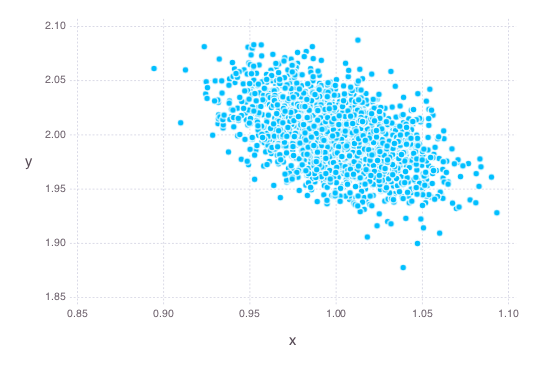

In [21]:
plot(x = r_est[1,:], y = r_est[2,:])

## A.2 Nonlinear Algebraic Equations